# CSCN8040 – Case Studies in Artificial Intelligence 
## Unit 4: Interim Results

### 1. Install Required Libraries

In [18]:
!pip install pandas matplotlib seaborn scipy

### 2. Read the Dataset and Replace Null Values

In [2]:
import pandas as pd
from scipy.stats import ttest_1samp
df = pd.read_csv("data.csv")
# handle null values, replace NaN with 0
df.fillna(0, inplace=True)
df.head()

,Device Name,Type,Average Cost (USD),Accessibility Features,Country Available,Country of Manufacture,Average Income of Visually Impaired Individuals (USD),Accessibility Rating,User Age Range,Battery Life (hrs),Warranty Period (years),Training/Support Required,Subsidy Availability,Weight (kg),Compatibility with Other Devices,Region Availability (Rural/Urban),User Reviews/Feedback
0,White Cane,Mobility Aid,$20 - $50,"Lightweight, foldable, tactile feedback","USA, Canada, UK, Australia","USA, China",25000,4,All ages,0,2,No,Yes,0.2,No,Urban,4.5
1,Braille Display,Communication Device,"$2,000 - $5,000","Refreshable Braille cells, USB and Bluetooth c...","USA, Canada, UK, Australia","USA, Germany",25000,5,Adults,0,3,Yes,No,0.8,Yes,Urban,4.8
2,Screen Reader Software,Software,"$900 - $1,200","Text-to-speech, keyboard shortcuts",Worldwide,USA,25000,4,All ages,0,1,Yes,Yes,0.0,Yes,"Urban, Rural",4.3
3,Smart Glasses,Wearable Technology,"$1,500 - $3,000","Object recognition, text reading","USA, Canada, UK, Australia",Canada,25000,3,Adults,5-6,2,Yes,No,0.5,No,Urban,4.0
4,Audio Book Player,Media Device,$100 - $300,"Large tactile buttons, variable speed","USA, Canada",USA,25000,5,All ages,15-20,1,No,Yes,0.3,No,"Urban, Rural",4.5


### 3. Exploratory Data Analysis

In [3]:
# basic statistics for the dataset
df.describe()

,Average Income of Visually Impaired Individuals (USD),Accessibility Rating,Warranty Period (years),Weight (kg),User Reviews/Feedback
count,10.0,10.000000,10.000000,10.000000,10.000000
mean,25000.0,4.300000,2.000000,0.600000,4.410000
std,0.0,0.674949,0.816497,0.394405,0.260128
min,25000.0,3.000000,1.000000,0.000000,4.000000
25%,25000.0,4.000000,1.250000,0.325000,4.225000
50%,25000.0,4.000000,2.000000,0.550000,4.450000
75%,25000.0,5.000000,2.750000,0.875000,4.575000
max,25000.0,5.000000,3.000000,1.200000,4.800000


### 4. Visualization 

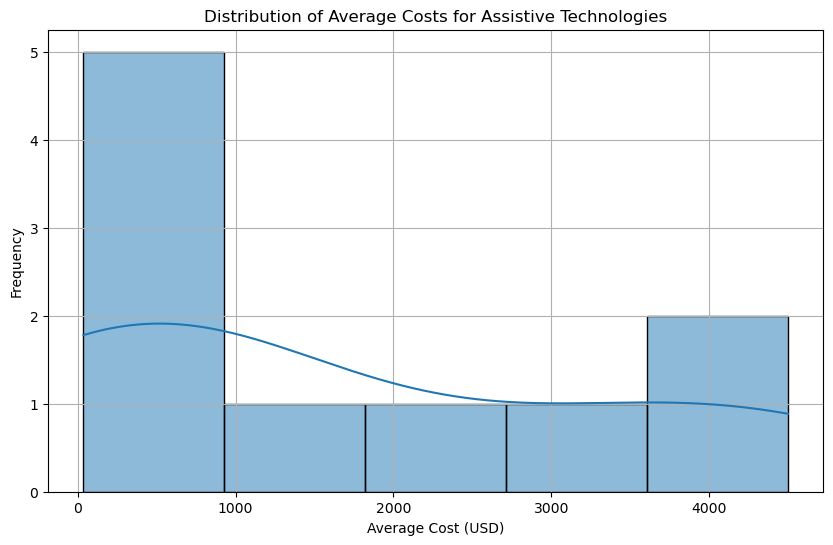

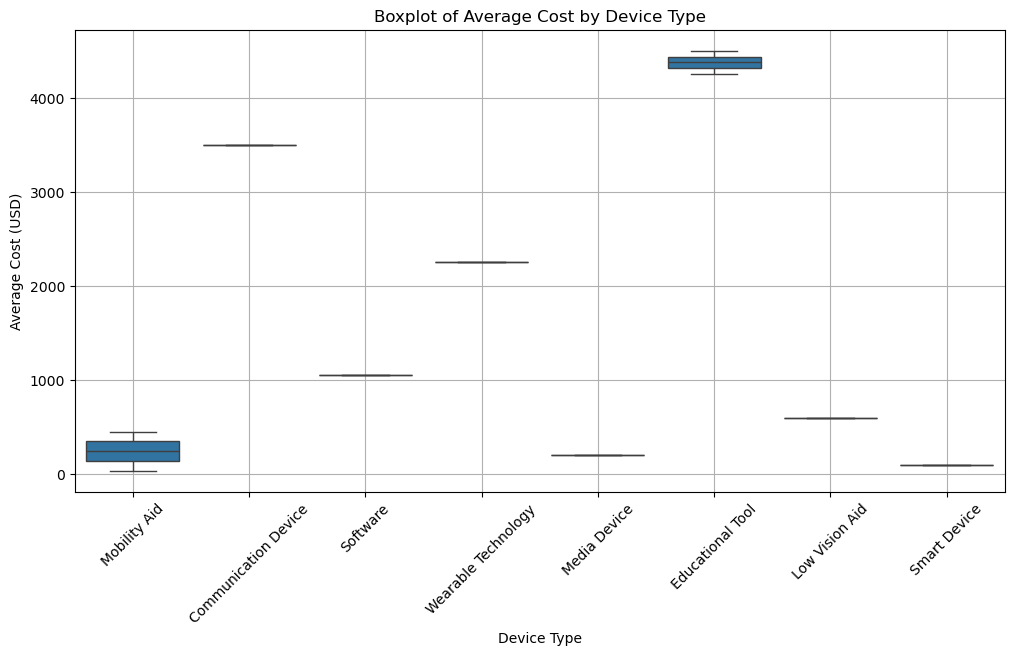

In [4]:
# Performing exploratory data analysis (EDA) on the dataset to understand distribution, central tendency, and cost analysis.

import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning the 'Average Cost (USD)' column by extracting the average value from the range
# Removing commas and converting cost ranges to numerical averages
df['Average Cost Cleaned'] = df['Average Cost (USD)'].str.replace(',', '').str.extract(r'\$(\d+) - \$?(\d+)').astype(float).mean(axis=1)

# Summary statistics for the cleaned 'Average Cost' column
summary_stats = df['Average Cost Cleaned'].describe()

# Visualizing the distribution of average costs
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Cost Cleaned'], kde=True)
plt.title("Distribution of Average Costs for Assistive Technologies")
plt.xlabel("Average Cost (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot by device type to observe cost differences
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type', y='Average Cost Cleaned')
plt.title("Boxplot of Average Cost by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Average Cost (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 5. Hypothesis Testing (t-test for small samples) 

In [ ]:
# Setting the affordability threshold for t-test
affordability_threshold = 400

# Performing one-sample t-test on the Average Cost Cleaned column
t_stat, p_value = ttest_1samp(df['Average Cost Cleaned'], affordability_threshold)

# Printing results with interpretation
if p_value < 0.05:
    result_statement = f"Reject the null hypothesis: The average cost of assistive technologies is significantly greater than the affordability threshold of ${affordability_threshold}."
else:
    result_statement = f"Fail to reject the null hypothesis: There is no significant evidence that the average cost of assistive technologies is greater than the affordability threshold of ${affordability_threshold}."

# Displaying t-statistic, p-value, and result interpretation
t_stat, p_value, result_statement

(np.float64(2.2921125456445814),
 np.float64(0.04760983573533982),
 'Reject the null hypothesis: The average cost of assistive technologies is significantly greater than the affordability threshold of $400.')